## Лабораторная работа 1

Выполнили: <br>
Машина Е. P4241 <br>
Щербаков В. P4216

В этой секции происходит установка необходимых библиотек и зависимостей, таких как gym, autorom, stable-baselines3, PyVirtualDisplay, и Xvfb (для виртуального дисплея).

In [1]:
# Установка необходимых библиотек
!pip install gym[atari]
!pip install autorom[accept-rom-license]
!pip install stable-baselines3
!pip install PyVirtualDisplay
!sudo apt-get install xvfb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 5.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for AutoROM.accept-rom-license: filename=AutoROM.accept_rom_license-0.6.1-py3-none-any.whl size=446660 sha256=90c4e21888bdf54ce149e8fe79078a74528f33f3eccc1cbf4da9cfbc428ce557
  Stored in directory: /root/.cache/pip/wheels/6b/1b/ef/a43ff1a2f1736d5711faa1ba4c1f61be1131b8899e6a057811
Successfully built AutoROM.accept-rom-license
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.7/181.7 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 13.1 MB/s eta 0:00:00
  Using cached Farama_Notifications-0.0.4-py3-none-any.whl (2.5 kB)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packag

Здесь производится импорт необходимых библиотек, таких как gym и DQN из пакета stable_baselines3.

In [2]:
# Импорт необходимых пакетов
import gymnasium as gym
from stable_baselines3 import DQN

#### Создание среды Mountain Car

В этой части кода создается среда MountainCar-v0, и извлекаются пространства наблюдения (observation_space) и действий (action_space) для данной среды.


In [3]:
# Создание среды MountainCar-v0
env = gym.make("MountainCar-v0")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
# Описание задачи
observation_space = env.observation_space
action_space = env.action_space

Здесь происходит инициализация модели DQN с использованием "MlpPolicy", обучение модели на указанное количество временных шагов, и сохранение обученной модели в файл "dqn_cartpole".

In [5]:
# Инициализация модели DQN
model = DQN("MlpPolicy", env, verbose=1)

# Обучение модели
timestamp=100
model.learn(total_timesteps=timestamp, log_interval=4)
model.save("dqn_cartpole")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


#### Тестирование модели

Этот код устанавливает пакет Xvfb, который необходим для визуализации среды в Colab.

In [6]:
!sudo apt-get install xvfb

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
xvfb is already the newest version (2:21.1.4-2ubuntu1.7~22.04.5).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [8]:
import gym
from IPython import display
from pyvirtualdisplay import Display
import matplotlib.pyplot as plt
from matplotlib import animation

Здесь инициализируется и запускается виртуальный дисплей, создается среда MountainCar-v0 для тестирования, и происходит сброс среды для получения начального наблюдения.

In [9]:
# Запуск виртуального дисплея
d = Display()
d.start()

# Создание среды MountainCar-v0 для тестирования
env = gym.make('MountainCar-v0')

# Сброс среды и получение начального наблюдения
obs = env.reset()

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


Этот участок кода выполняет цикл, в котором модель используется для прогнозирования действия, это действие применяется к среде, и текущий кадр среды записывается в виде изображения для создания анимации.

In [10]:
# Запись изображений для создания анимации
img = []
for _ in range(100):
    # Прогноз действия с использованием обученной модели
    action, _states = model.predict(obs, deterministic=True)
    # Применение действия к среде
    obs, reward, terminated, truncated = env.step(action)

    # Очистка вывода для анимации
    display.clear_output(wait=True)
    # Запись текущего кадра среды в виде изображения
    img.append(env.render('rgb_array'))

    # Сброс среды (если используется виртуальный дисплей)
    if d:
        env.reset()


/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


Здесь определяются параметры для создания анимации, и сама анимация создается и отображается с использованием библиотеки matplotlib.

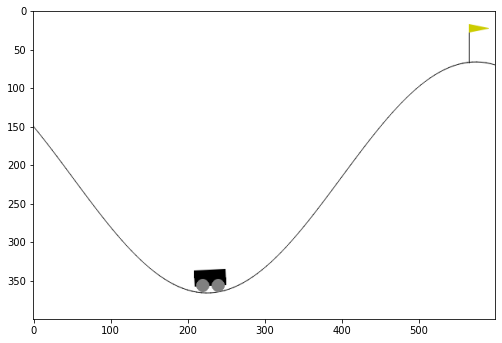

In [11]:
# Параметры для создания анимации
dpi = 72
interval = 50  # ms

# Создание и отображение анимации
plt.figure(figsize=(img[0].shape[1] / dpi, img[0].shape[0] / dpi), dpi=dpi)
patch = plt.imshow(img[0])
plt.axis=('off')
animate = lambda i: patch.set_data(img[i])
ani = animation.FuncAnimation(plt.gcf(), animate, frames=len(img), interval=interval)
display.display(display.HTML(ani.to_jshtml()))


#### Закрытие среды после тестирования
По завершении тестирования мы закрываем среду с помощью env.close().

In [12]:
# Закрытие среды после тестирования
env.close()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Вывод

В рамках самостоятельной работы мы продемонстрировали использование библиотек для работы с окружением OpenAI Gym, обучения модели глубокого обучения на примере задачи MountainCar-v0, и визуализации результатов обучения в Colab с использованием анимации.

1. **Установка библиотек:**
Были установлены необходимые библиотеки и зависимости, такие как Gym, Stable-Baselines3, PyVirtualDisplay, и Xvfb. Это необходимо для работы с окружением, обучения модели и визуализации в Colab.

2. **Импорт и настройка окружения:**
Импортированы библиотеки, такие как Gym и Stable-Baselines3, и создано окружение задачи MountainCar-v0. Пространства наблюдения и действий были извлечены для дальнейшего использования в обучении.

3. **Обучение модели:**
Использован алгоритм DQN для обучения модели глубокого обучения на среде MountainCar-v0. Модель обучалась на протяжении заданного количества временных шагов, и результаты сохранены для дальнейшего использования.

4. **Виртуальный дисплей и визуализация:**
Установлен виртуальный дисплей (Xvfb) для визуализации окружения в Colab. Библиотеки PyVirtualDisplay и Matplotlib использовались для создания анимации, которая отображает визуальные результаты тестирования обученной модели.

5. **Анимация и вывод:**
Создан цикл, в котором обученная модель использовалась для прогнозирования действий в среде. Кадры среды были записаны в виде изображений, а затем использованы для создания анимации. Анимация была отображена в ячейке вывода Colab.

6. **Закрытие среды:**
В конце кода среда была закрыта для освобождения ресурсов.